# Inteligência Artificial – XMCO01
Antony Souza Siqueira - 2022015120 \
Gustavo Rafael Paulino - 2022006185 \
João Pedro Mendes Siqueira Rennó - 2022010651 \
Lucas Luiz da Silva - 2022008662 \
Pedro Junho Silveira - 2022002112 \
Vítor Ortiz Gomes - 2022006256

# Fundamentos

Import das bibliotecas

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

Carregando o dataset


In [62]:
dataset = pd.read_csv("telecom.csv")
dataset

,n_mensagens_voz,minutos_manha,chamadas_manha,custo_manha,minutos_tarde,chamadas_tarde,custo_tarde,minutos_noite,chamadas_noite,custo_noite,minutos_internacional,chamadas_internacional,custo_internacional,atendimento_cliente,cancelamento
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Atributos:

- Nº mensagens_voz: qunatidade de mensagens de voz que o cliente recebe
- Minutos manha: minutos utilizados em chamadas pela manhã
- Chamadas manha: número de chamadas realizadas pela manhã
- Custo manha: custo das chamadas realizadas pela manhã
- Minutos tarde: minutos utilizados em chamadas pela tarde
- Chamadas tarde: número de chamadas realizadas pela tarde
- Custo tarde: custo das chamadas realizadas pela tarde
- Minutos noite: minutos utilizados em chamadas pela noite
- Chamadas noite: número de chamadas realizadas pela noite
- Custo noite: custo das chamadas realizadas pela noite
- Minutos internacional:  minutos utilizados em chamadas internacionais
- Chamadas internacional: número de chamadas internacionais
- Custo internacional: custo das chamadas internacionais
- Atendimento cliente: quantidade de chamadas feitas pelo cliente para a central de atendimento ao cliente
- Cancelamento: indica se o cliente cancelou o plano (True) ou não (False)

Verificando a distribuição das classes

In [63]:
print(dataset['cancelamento'].value_counts(normalize=True))

cancelamento
False    0.854464
True     0.145536
Name: proportion, dtype: float64


Separando as características e o rótulo

In [64]:
X = dataset.iloc[:, 0:14]
Y = dataset.iloc[:, 14:]

Dividindo os dados em treino e teste

In [65]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size= 0.3, random_state= 1, stratify= Y)
Y_treino = Y_treino.values.ravel()
Y_teste = Y_teste.values.ravel()

# Árvore de Decisão

In [66]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_treino, Y_treino)

DecisionTreeClassifier()

Visualizando a Árvore de Decisão

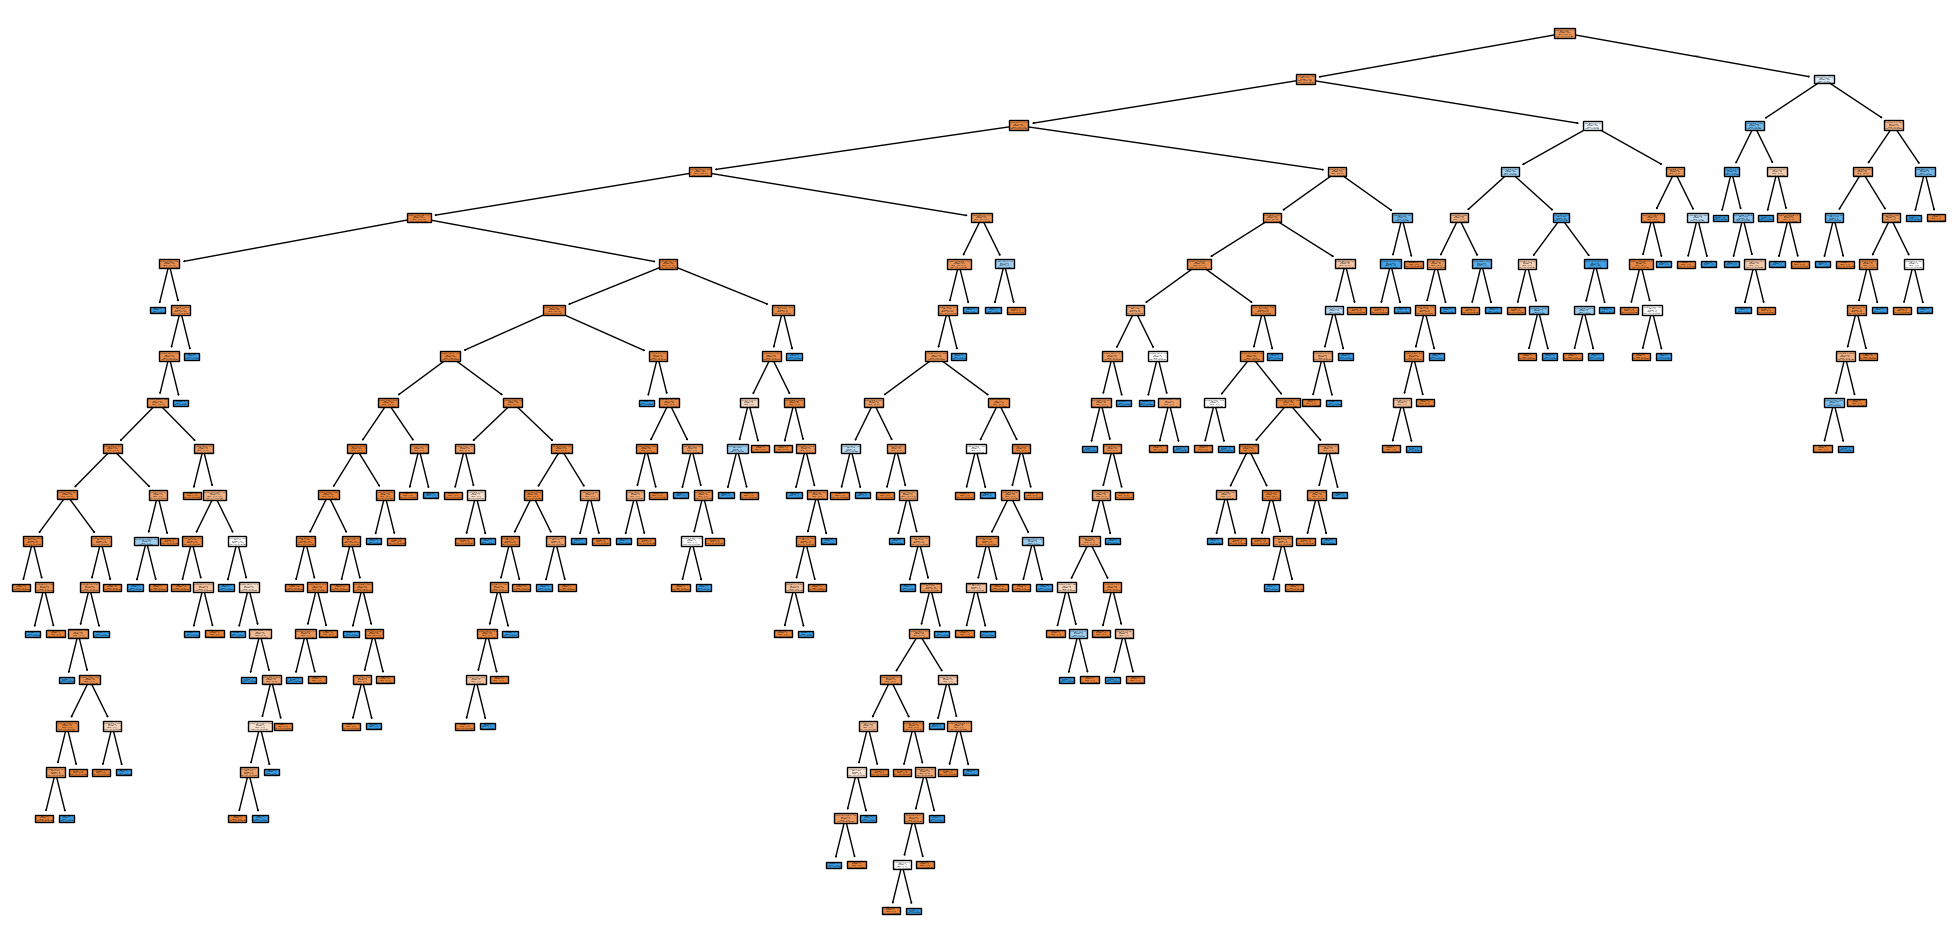

In [67]:
plt.figure(figsize=(25, 12))
tree.plot_tree(clf_dt, filled=True, feature_names=list(X.columns), class_names=["Não cancelaram", "Cancelaram"])
plt.show()

Exportando as regras de decisão da árvore

In [68]:
r = export_text(clf_dt, feature_names=list(X.columns))
print(r)

|--- atendimento_cliente <= 3.50
|   |--- custo_manha <= 43.68
|   |   |--- minutos_manha <= 221.80
|   |   |   |--- custo_internacional <= 3.57
|   |   |   |   |--- chamadas_internacional <= 2.50
|   |   |   |   |   |--- chamadas_manha <= 46.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- chamadas_manha >  46.50
|   |   |   |   |   |   |--- minutos_tarde <= 336.35
|   |   |   |   |   |   |   |--- chamadas_noite <= 144.50
|   |   |   |   |   |   |   |   |--- chamadas_manha <= 105.50
|   |   |   |   |   |   |   |   |   |--- minutos_tarde <= 277.10
|   |   |   |   |   |   |   |   |   |   |--- chamadas_manha <= 93.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- chamadas_manha >  93.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- minutos_tarde >  277.10
|   |   |   |   |   |   |   |   |   |   |--- custo_tarde <= 24.42
|  

Analisando a importância dos recursos

In [69]:
importances = clf_dt.feature_importances_
indices = np.argsort(importances)[::-1]
print("Importâncias dos recursos:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {X.columns[indices[i]]}: {importances[indices[i]]}")

Importâncias dos recursos:
1. minutos_tarde: 0.1831977740272721
2. custo_manha: 0.15309966058535038
3. atendimento_cliente: 0.12318164568604972
4. minutos_manha: 0.1151252764602966
5. n_mensagens_voz: 0.08629432663583712
6. chamadas_noite: 0.0695986491597557
7. minutos_noite: 0.05126482642424539
8. custo_noite: 0.04613597228885171
9. chamadas_manha: 0.03765127650736431
10. minutos_internacional: 0.034233030270234686
11. custo_tarde: 0.032278345604699464
12. chamadas_internacional: 0.022943864451987598
13. chamadas_tarde: 0.02266840339479104
14. custo_internacional: 0.022326948503264357


Predição com a Árvore de Decisão

In [70]:
predictions_dt = clf_dt.predict(X_teste)

Relatório de classificação e matriz de confusão da Árvore de Decisão

Relatório de métricas para Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       684
        True       0.53      0.53      0.53       116

    accuracy                           0.86       800
   macro avg       0.72      0.73      0.72       800
weighted avg       0.86      0.86      0.86       800



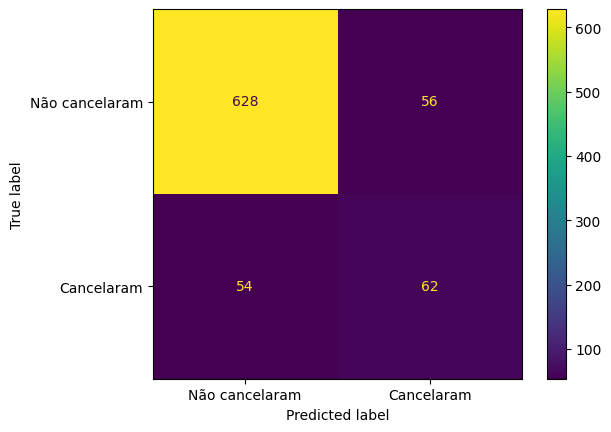

In [71]:
print("Relatório de métricas para Árvore de Decisão:")
print(classification_report(Y_teste, predictions_dt))
cm_dt = confusion_matrix(Y_teste, predictions_dt)
cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=["Não cancelaram", "Cancelaram"])
cmd_dt.plot(values_format="d")
plt.show()

# Testando diferentes parâmetros para a Árvore de Decisão

In [72]:
# suprimindo avisos específicos
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# define os parâmetros a ser combinados
parametros_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

melhor_score_dt = 0
melhores_parametros_dt = {}

for criterion in parametros_dt['criterion']:
    for max_depth in parametros_dt['max_depth']:
        for min_samples_split in parametros_dt['min_samples_split']:
            for min_samples_leaf in parametros_dt['min_samples_leaf']:
                clf_dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=1)
                clf_dt.fit(X_treino, Y_treino)
                y_pred_dt = clf_dt.predict(X_teste)

                score = classification_report(Y_teste, y_pred_dt, output_dict=True)['accuracy']
                if score > melhor_score_dt:
                    melhor_score_dt = score
                    melhores_parametros_dt = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# exibe o resultado do melhor parâmetro
print(f"Melhores parâmetros para Árvore de Decisão: {melhores_parametros_dt}, com score: {melhor_score_dt}")


Melhores parâmetros para Árvore de Decisão: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}, com score: 0.9025


Avaliação do melhor modelo de Árvore de Decisão

Relatório de métricas para o melhor modelo de Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       684
        True       0.75      0.49      0.59       116

    accuracy                           0.90       800
   macro avg       0.83      0.73      0.77       800
weighted avg       0.89      0.90      0.89       800



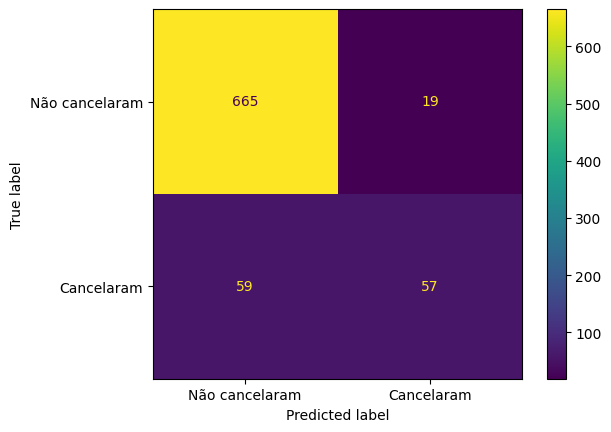

In [73]:
clf_dt = DecisionTreeClassifier(**melhores_parametros_dt, random_state=1)
clf_dt.fit(X_treino, Y_treino)
y_pred_dt = clf_dt.predict(X_teste)
print("Relatório de métricas para o melhor modelo de Árvore de Decisão:")
print(classification_report(Y_teste, y_pred_dt))
cm_dt = confusion_matrix(Y_teste, y_pred_dt)
cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=["Não cancelaram", "Cancelaram"])
cmd_dt.plot(values_format="d")
plt.show()

# MLP

In [74]:
clf_mlp = MLPClassifier()
clf_mlp.fit(X_treino, Y_treino)

MLPClassifier()

Predição com o MLP

In [75]:
predictions_mlp = clf_mlp.predict(X_teste)

Relatório de classificação e matriz de confusão do MLP

Relatório de métricas para MLP:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       684
        True       0.50      0.10      0.17       116

    accuracy                           0.85       800
   macro avg       0.68      0.54      0.55       800
weighted avg       0.81      0.85      0.81       800



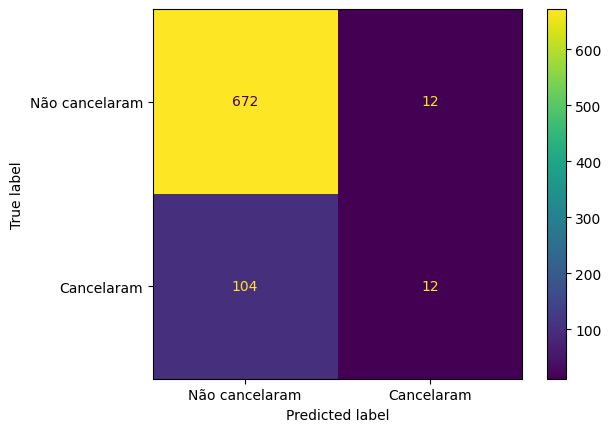

In [76]:
print("Relatório de métricas para MLP:")
print(classification_report(Y_teste, predictions_mlp))
cm_mlp = confusion_matrix(Y_teste, predictions_mlp)
cmd_mlp = ConfusionMatrixDisplay(cm_mlp, display_labels=["Não cancelaram", "Cancelaram"])
cmd_mlp.plot(values_format="d")
plt.show()

# Testando diferentes parâmetros para o MLP

In [77]:
# suprimindo avisos específicos
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# define os parametros a serem combinados
parametros_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'alpha': [0.0001, 0.001, 0.01]
}

melhor_score_mlp = 0
melhores_parametros_mlp = {}

for hidden_layer_sizes in parametros_mlp['hidden_layer_sizes']:
    for activation in parametros_mlp['activation']:
        for alpha in parametros_mlp['alpha']:
            clf_mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, random_state=1, max_iter=100)
            clf_mlp.fit(X_treino, Y_treino)
            y_pred_mlp = clf_mlp.predict(X_teste)

            score = classification_report(Y_teste, y_pred_mlp, output_dict=True)['accuracy']
            if score > melhor_score_mlp:
                melhor_score_mlp = score
                melhores_parametros_mlp = {
                    'hidden_layer_sizes': hidden_layer_sizes,
                    'activation': activation,
                    'alpha': alpha
                }
# exibe apenas os melhores parâmetros
print(f"Melhores parâmetros para MLP: {melhores_parametros_mlp}, com score: {melhor_score_mlp}")

Melhores parâmetros para MLP: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'alpha': 0.0001}, com score: 0.86625


Avaliação do melhor modelo de MLP

Relatório de métricas para o melhor modelo de MLP:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       684
        True       0.53      0.25      0.34       116

    accuracy                           0.86       800
   macro avg       0.71      0.61      0.63       800
weighted avg       0.83      0.86      0.84       800



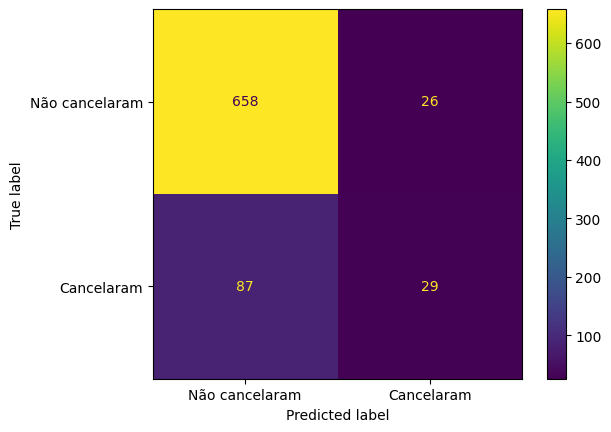

In [78]:
clf_mlp = MLPClassifier(**melhores_parametros_mlp, random_state=1, max_iter=300)
clf_mlp.fit(X_treino, Y_treino)
y_pred_mlp = clf_mlp.predict(X_teste)
print("Relatório de métricas para o melhor modelo de MLP:")
print(classification_report(Y_teste, y_pred_mlp))
cm_mlp = confusion_matrix(Y_teste, y_pred_mlp)
cmd_mlp = ConfusionMatrixDisplay(cm_mlp, display_labels=["Não cancelaram", "Cancelaram"])
cmd_mlp.plot(values_format="d")
plt.show()